In [47]:
import pandas as pd
import os
import numpy as np
import calendar
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

### Merging 12 months of sale data into a single file

In [2]:
#read the path
file_path = "./Sales_Data"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df_allData = pd.DataFrame()

# append the CSV files
for file in file_list:
    file_full_path = file_path + '/' + file
    df = pd.read_csv(file_full_path)
    df_allData = pd.concat([df_allData,df])

df_allData.to_csv('all_data.csv', index=False)

### Read in updated datafream

In [4]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning the data!!

#### Drop rows of NaN

In [5]:
dropna_data = all_data.dropna(how='all')
dropna_data.head()
all_data = dropna_data
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Find 'Or' Value in Month and delete it

In [6]:
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

all_data = all_data.loc[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to te correct type (str to numeric)

In [7]:
all_data.loc[:, 'Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data.loc[:, 'Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Add Month Column

In [14]:
all_data.loc[:, 'Month'] = all_data['Order Date'].str[0:2]
all_data = all_data.dropna(subset=['Month'])
all_data.loc[:, 'Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Q1: What was the best month for sales? How much was earned that month?


In [9]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
results = all_data.groupby('Month').sum() #sum() returns the sum of the values for the requested axis
best_month = results['Sales'].idxmax() #idxmax() returns the index of the maximum value
best_month_sales = results['Sales'].max() #max() returns the maximum value

best_month_name = calendar.month_name[int(best_month)]
print(f"Best month for sales: {best_month_name} with sales of ${best_month_sales}")

Best month for sales: December with sales of $4613443.340001534


#### Visualization

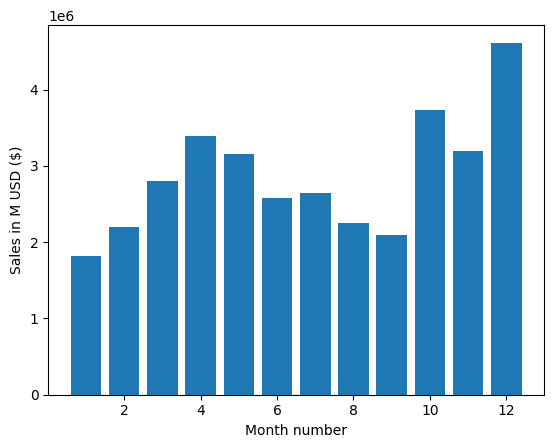

In [10]:
plt.bar(results.index, results['Sales']) #plt.bar(x,y)
plt.ylabel('Sales in M USD ($)')
plt.xlabel('Month number')
plt.show()

### Q2: What city sold the most product?

#### Add City Column

In [11]:
def get_state(x):
    return x.split(',')[1]

all_data['City'] = ""
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip() + ' (' + all_data['Purchase Address'].str.split(',').str[2].str.split(' ').str[1] + ')'
all_data.head()
# Apply method
# all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

# Drop a column
# all_data = all_data.drop(columns='Column Name')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.0,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Calculate Amount of products

In [12]:
product_per_city = all_data.groupby('City').sum()
city = product_per_city['Sales'].idxmax()
sales_city = product_per_city['Sales'].max()
print(f"City with the highest sales: {city} with sales of ${sales_city}")

City with the highest sales: San Francisco (CA) with sales of $8262203.910004012


#### Visualization

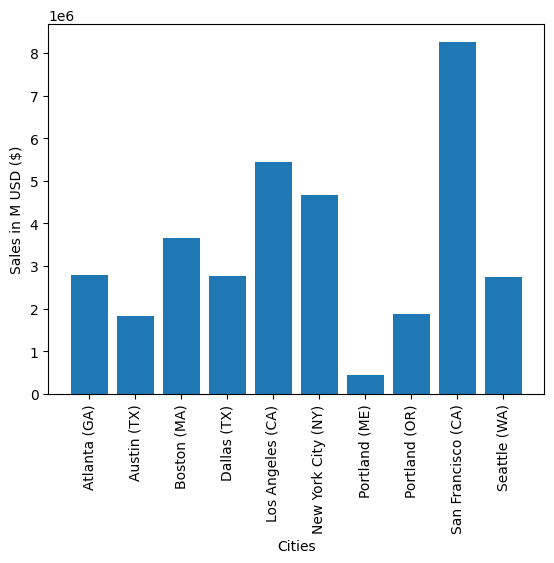

In [13]:
plt.bar(product_per_city.index, product_per_city['Sales']) #plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.ylabel('Sales in M USD ($)')
plt.xlabel('Cities')
plt.show()

### Q3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

#### String Order Date to Datetime format

In [19]:
all_data.loc[:,'Order Date'] = pd.to_datetime(all_data['Order Date'])

#### Add Hour and Minute Columns

In [22]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Visualization

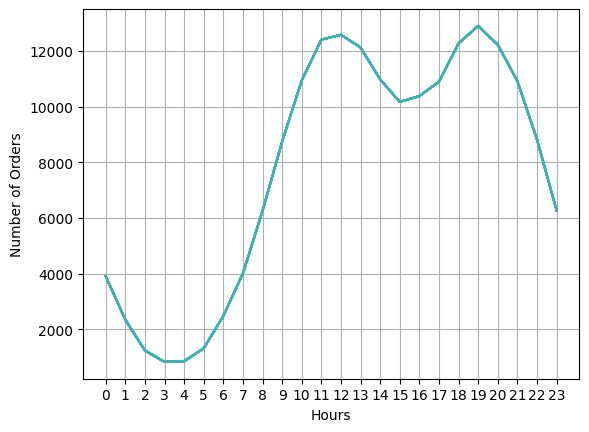

In [23]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Recommendation based on peaks

In [54]:
# Group the data by 'Hour' and count the number of orders
orders_by_hour = all_data.groupby(['Hour'])['Order ID'].count()

# Find the indices of all peaks
indices = find_peaks(orders_by_hour.values)[0]

# Get the hours corresponding to the peaks
peak_hours = orders_by_hour.index[indices]

# If there are more than two peaks, get the hours for the two highest peaks
if len(peak_hours) > 2:
    peak_values = orders_by_hour.values[indices]
    peak_hours = peak_hours[np.argsort(peak_values)[-2:]]

peak_hours = np.sort(peak_hours)
print(f"We recommend advertising around {peak_hours[0]}:00 and {peak_hours[1]}:00")

We recommend advertising around 12:00 and 19:00


### Q4: What products are most often sold together?

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.0,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


#### Products for each order

In [106]:
group_orders = all_data.groupby('Order ID')
product_group = group_orders['Product'].transform(lambda x: ', '.join(x)) #transform() returns a DataFrame with the same index as the original DataFrame
product_group = product_group.drop_duplicates() #drop_duplicates() returns a DataFrame with duplicate rows removed
product_group

0                                      USB-C Charging Cable
2                                Bose SoundSport Headphones
3                            Google Phone, Wired Headphones
5                                          Wired Headphones
9                                        Macbook Pro Laptop
                                ...                        
173856                     LG Dryer, 27in 4K Gaming Monitor
174201    Google Phone, USB-C Charging Cable, Wired Head...
176840                   LG Dryer, Lightning Charging Cable
177793                            ThinkPad Laptop, LG Dryer
180004            LG Washing Machine, AA Batteries (4-pack)
Name: Product, Length: 385, dtype: object

#### List of products

In [107]:
list_of_products = []

for i in product_group:
    list_of_products.append(i)
    
list_of_products

['USB-C Charging Cable',
 'Bose SoundSport Headphones',
 'Google Phone, Wired Headphones',
 'Wired Headphones',
 'Macbook Pro Laptop',
 'Google Phone',
 'Lightning Charging Cable',
 '27in 4K Gaming Monitor',
 'AA Batteries (4-pack)',
 'Apple Airpods Headphones',
 'Google Phone, USB-C Charging Cable',
 'AAA Batteries (4-pack)',
 'iPhone',
 'Flatscreen TV',
 'Bose SoundSport Headphones, Bose SoundSport Headphones',
 'AAA Batteries (4-pack), Google Phone',
 '27in FHD Monitor',
 '20in Monitor',
 'LG Dryer',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'LG Washing Machine',
 '34in Ultrawide Monitor',
 'Lightning Charging Cable, USB-C Charging Cable',
 'Apple Airpods Headphones, ThinkPad Laptop',
 'Bose SoundSport Headphones, AAA Batteries (4-pack)',
 '34in Ultrawide Monitor, Google Phone',
 'iPhone, Lightning Charging Cable',
 'Google Phone, Bose SoundSport Headphones, Wired Headphones',
 'AAA Batteries (4-pack), 27in FHD Monitor',
 'USB-C Charging Cable, AAA Batteries (4-pack)',
 'iPhone, Wire

#### Finding the differents combinations of sales

In [108]:
for i in list_of_products:
    if ',' in i:
        order = i.split(', ')
        for j in range(len(order)):
            for k in range(j+1, len(order)):
                pair = (order[j], order[k])
                if pair in count_prodct_combinations:
                    count_prodct_combinations[pair] += 1
                else:
                    count_prodct_combinations[pair] = 1

count_prodct_combinations

{('Google Phone', 'Wired Headphones'): 14,
 ('Google Phone', 'USB-C Charging Cable'): 21,
 ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 1,
 ('AAA Batteries (4-pack)', 'Google Phone'): 1,
 ('Lightning Charging Cable', 'USB-C Charging Cable'): 3,
 ('Apple Airpods Headphones', 'ThinkPad Laptop'): 1,
 ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 1,
 ('34in Ultrawide Monitor', 'Google Phone'): 1,
 ('iPhone', 'Lightning Charging Cable'): 19,
 ('Google Phone', 'Bose SoundSport Headphones'): 8,
 ('Bose SoundSport Headphones', 'Wired Headphones'): 5,
 ('AAA Batteries (4-pack)', '27in FHD Monitor'): 1,
 ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 2,
 ('iPhone', 'Wired Headphones'): 8,
 ('iPhone', '27in 4K Gaming Monitor'): 2,
 ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 1,
 ('iPhone', 'Apple Airpods Headphones'): 7,
 ('iPhone', 'AAA Batteries (4-pack)'): 3,
 ('Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 2,
 ('Wired Headphones', 'Apple Airpods He

#### Showing the most common combination

In [112]:
most_sold_together = max(count_prodct_combinations, key=count_prodct_combinations.get)
total_orders_sold_together = count_prodct_combinations[most_sold_together]

print(f"The products that are most often sold together are {most_sold_together} with {total_orders_sold_together} orders pair together.")

The products that are most often sold together are ('Google Phone', 'USB-C Charging Cable') with 21 orders pair together.
